In [1]:
from matplotlib.pyplot import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize, rescale
from skimage import color
import scipy.signal

%matplotlib inline

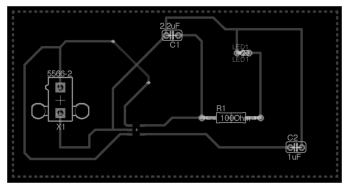

In [2]:
def get_gray_norm_image(path):
    orig_img = imread(path)
    gray_img = color.rgb2gray(orig_img)
    norm_img = gray_img/255.
    return norm_img

img = get_gray_norm_image('./pcb_image_1.png')
plt.axis('off')
plt.imshow(img, cmap='gray')

In [3]:
def show_component(h_start=0, h_end=1, w_start=0, w_end=1):
    """
    show component from h_start to h_start, w_start to w_end (input [0, 1])
    """

    plt.axis('off')
    h, w = img.shape
    
    kernel = img[int(h*h_start):int(h*h_end), int(w*w_start):int(w*w_end)]
    plt.imshow(kernel, cmap='gray')
    return kernel

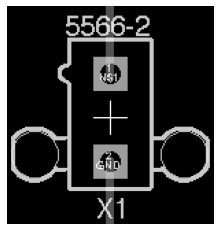

In [4]:
component0_labeled = show_component(0.35, 0.71, 0.07, 0.25)

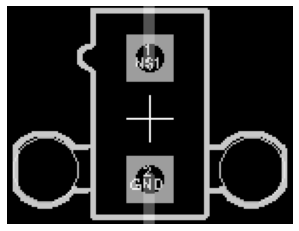

In [5]:
component0_unlabeled = show_component(0.4, 0.66, 0.07, 0.25)

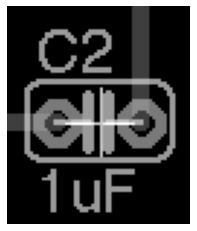

In [6]:
component1_labeled = show_component(0.71, 0.88, 0.825, 0.90)

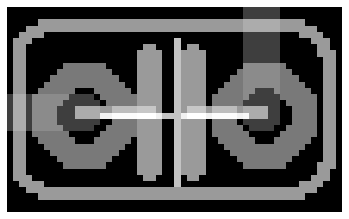

In [7]:
component1_unlabeled = show_component(0.761, 0.836, 0.831, 0.895)

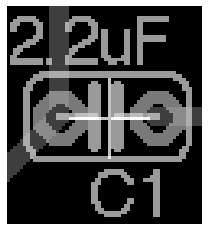

In [8]:
component12_labeled = show_component(0.09, 0.24, 0.457, 0.528)

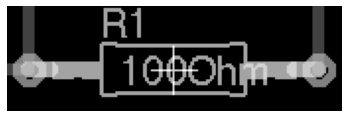

In [9]:
component2_labeled = show_component(0.56, 0.68, 0.569, 0.771)

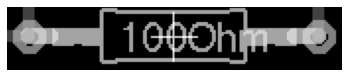

In [10]:
component2_unlabeled = show_component(0.598, 0.671, 0.569, 0.771)

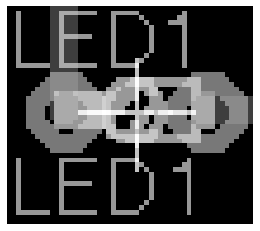

In [11]:
component3_labeled = show_component(0.215, 0.32, 0.672, 0.735)

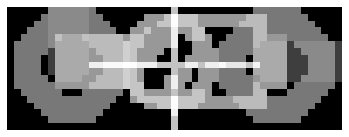

In [12]:
component3_unlabeled = show_component(0.248, 0.288, 0.676, 0.735)

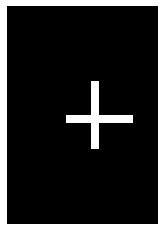

In [13]:
component4_labeled = show_component(0.67, 0.73, 0.375, 0.397)

In [14]:
component4_unlabeled = component4_labeled

In [15]:
def get_detected(img, component):
    signed_img = np.where(img > 0, 1, -1)
    signed_component = np.where(component > 0, 1, -1)
    m1, n1 = signed_img.shape[:2]
    m2, n2 = signed_component.shape[:2]
    convolved = np.zeros(signed_img.shape)
    for i in range(m1-m2):
        for j in range(n1-n2):
            convolved[i, j] = np.sum(signed_img[i:i+m2, j:j+n2]*signed_component)

    
    loc = np.argmax(convolved.flatten())
    i, j = loc//n1, loc % n1
    matched = np.zeros(img.shape)
    matched[i:i+m2, j:j+n2] = img[i:i+m2, j:j+n2]
    return matched
    

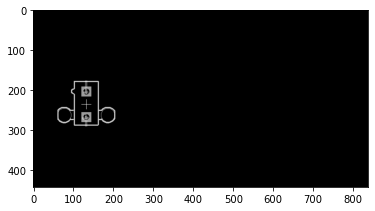

In [16]:
plt.imshow(get_detected(img, component0_unlabeled), cmap='gray')

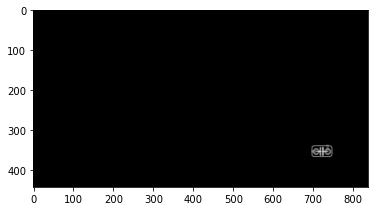

In [17]:
plt.imshow(get_detected(img, component1_unlabeled), cmap='gray')

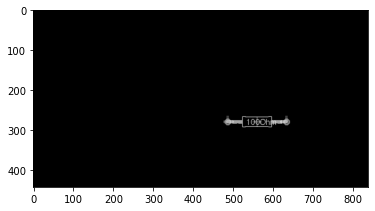

In [18]:
plt.imshow(get_detected(img, component2_unlabeled), cmap='gray')

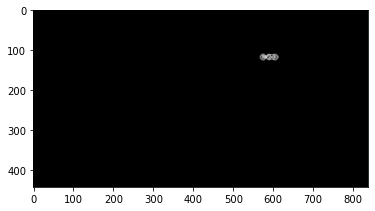

In [19]:
plt.imshow(get_detected(img, component3_unlabeled), cmap='gray')

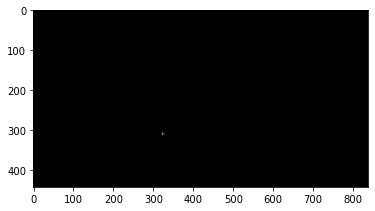

In [20]:
plt.imshow(get_detected(img, component4_unlabeled), cmap='gray')